In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display, clear_output

In [2]:
df = pd.read_csv("F:\data\spy_archive\spy_2020_2022.csv")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

C:\Users\unmes\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: DtypeWarning: Columns (8,9,10,11,12,13,15,17,18,20,21,23,24,25,26,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.columns = ['QuoteTime','QuoteReadTime','QuoteDate',
              'QuoteTimeHours','Underlying','ExpiryDate',
              'ExpiryUnix','DTE','C_Delta','C_Gamma','C_Vega',
              'C_Theta','C_Rho','C_IV','C_Volume','C_Last',
              'C_Size','C_Bid','C_Ask','C_Strike','P_Bid',
              'P_Ask','P_Size','P_Last','P_Delta','P_Gamma',
              'P_Vega','P_Theta','P_Rho','P_IV','P_Vol',
              'Strike_Distance','Strike_Distance_pct']

In [4]:
df.columns

Index(['QuoteTime', 'QuoteReadTime', 'QuoteDate', 'QuoteTimeHours',
       'Underlying', 'ExpiryDate', 'ExpiryUnix', 'DTE', 'C_Delta', 'C_Gamma',
       'C_Vega', 'C_Theta', 'C_Rho', 'C_IV', 'C_Volume', 'C_Last', 'C_Size',
       'C_Bid', 'C_Ask', 'C_Strike', 'P_Bid', 'P_Ask', 'P_Size', 'P_Last',
       'P_Delta', 'P_Gamma', 'P_Vega', 'P_Theta', 'P_Rho', 'P_IV', 'P_Vol',
       'Strike_Distance', 'Strike_Distance_pct'],
      dtype='object')

In [5]:
df = df.replace(' ', 0)

In [6]:
for col in df.columns:
    if 'C_' in col or 'P_' in col:
        if '_Size' in col:
            continue
        print(col)
        df[col] = df[col].astype(float)
        

C_Delta
C_Gamma
C_Vega
C_Theta
C_Rho
C_IV
C_Volume
C_Last
C_Bid
C_Ask
C_Strike
P_Bid
P_Ask
P_Last
P_Delta
P_Gamma
P_Vega
P_Theta
P_Rho
P_IV
P_Vol


In [85]:
df['ExpiryDate'] = pd.to_datetime(df['ExpiryDate'], format='%Y-%m-%d')
df['QuoteDate'] = pd.to_datetime(df['QuoteDate'], format='%Y-%m-%d')


In [104]:


# Define bins and labels for the categories
bins =   [-np.inf,        30,   60,   90,  120, 150,float('inf')]
labels = ['30', '60', '90', '120','150','150+']

# Convert integers to categorical values
df['DTE_Hue'] = pd.cut(df['DTE'], bins=bins, labels=labels)


In [105]:
df.head()

,QuoteTime,QuoteReadTime,QuoteDate,QuoteTimeHours,Underlying,ExpiryDate,ExpiryUnix,DTE,C_Delta,C_Gamma,...,P_Delta,P_Gamma,P_Vega,P_Theta,P_Rho,P_IV,P_Vol,Strike_Distance,Strike_Distance_pct,DTE_Hue
0,1630526400,2021-09-01 16:00,2021-09-01,16.00000,451.85000,2021-09-01,1630526400,0.00000,1.00000,0.00000,...,-0.00024,0.00000,0.00004,-0.00509,0.00000,3.41249,3.00000,181.90000,0.40200,30
1,1630526400,2021-09-01 16:00,2021-09-01,16.00000,451.85000,2021-09-01,1630526400,0.00000,1.00000,0.00000,...,-0.00063,0.00003,0.00019,-0.00480,0.00000,3.29737,0.00000,176.90000,0.39100,30
2,1630526400,2021-09-01 16:00,2021-09-01,16.00000,451.85000,2021-09-01,1630526400,0.00000,1.00000,0.00000,...,0.00000,0.00000,-0.00023,-0.00534,0.00000,3.18330,11.00000,171.90000,0.38000,30
3,1630526400,2021-09-01 16:00,2021-09-01,16.00000,451.85000,2021-09-01,1630526400,0.00000,1.00000,0.00000,...,-0.00016,0.00004,0.00038,-0.00532,0.00000,3.07217,50.00000,166.90000,0.36900,30
4,1630526400,2021-09-01 16:00,2021-09-01,16.00000,451.85000,2021-09-01,1630526400,0.00000,1.00000,0.00000,...,-0.00068,0.00000,0.00045,-0.00515,0.00000,2.96230,0.00000,161.90000,0.35800,30


In [106]:
df.tail()

,QuoteTime,QuoteReadTime,QuoteDate,QuoteTimeHours,Underlying,ExpiryDate,ExpiryUnix,DTE,C_Delta,C_Gamma,...,P_Delta,P_Gamma,P_Vega,P_Theta,P_Rho,P_IV,P_Vol,Strike_Distance,Strike_Distance_pct,DTE_Hue
3589074,1614373200,2021-02-26 16:00,2021-02-26,16.00000,380.36000,2023-12-15,1702674000,1022.00000,0.10857,0.00156,...,-0.97430,0.00000,0.00000,-0.00983,-15.93849,0.00034,0.00000,189.60000,0.49900,150+
3589075,1614373200,2021-02-26 16:00,2021-02-26,16.00000,380.36000,2023-12-15,1702674000,1022.00000,0.10086,0.00154,...,-0.97337,0.00000,0.00000,-0.00973,-16.07810,0.00000,0.00000,194.60000,0.51200,150+
3589076,1614373200,2021-02-26 16:00,2021-02-26,16.00000,380.36000,2023-12-15,1702674000,1022.00000,0.10031,0.00147,...,-0.97362,0.00000,0.00000,-0.00988,-16.21757,0.00041,0.00000,199.60000,0.52500,150+
3589077,1614373200,2021-02-26 16:00,2021-02-26,16.00000,380.36000,2023-12-15,1702674000,1022.00000,0.09050,0.00138,...,-0.97339,0.00000,0.00000,-0.00930,-16.35750,-0.00037,0.00000,204.60000,0.53800,150+
3589078,1614373200,2021-02-26 16:00,2021-02-26,16.00000,380.36000,2023-12-15,1702674000,1022.00000,0.09046,0.00135,...,-0.97411,0.00000,0.00000,-0.00925,-16.49721,-0.00017,1.00000,209.60000,0.55100,150+


In [88]:
categorical_data

[NaN, NaN, NaN, NaN, NaN, ..., '90', '90', '90', '90', '90']
Length: 100
Categories (4, object): ['30' < '60' < '90' < '150']

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589079 entries, 0 to 3589078
Data columns (total 33 columns):
 #   Column               Dtype         
---  ------               -----         
 0   QuoteTime            int64         
 1   QuoteReadTime        object        
 2   QuoteDate            datetime64[ns]
 3   QuoteTimeHours       float64       
 4   Underlying           float64       
 5   ExpiryDate           datetime64[ns]
 6   ExpiryUnix           int64         
 7   DTE                  float64       
 8   C_Delta              float64       
 9   C_Gamma              float64       
 10  C_Vega               float64       
 11  C_Theta              float64       
 12  C_Rho                float64       
 13  C_IV                 float64       
 14  C_Volume             float64       
 15  C_Last               float64       
 16  C_Size               object        
 17  C_Bid                float64       
 18  C_Ask                float64       
 19  C_Strike             

In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
QuoteTime,3589079.00000,1625101930.62242,26622082.81275,1577998800.00000,1602187200.00000,1625688000.00000,1647460800.00000,1672434000.00000
QuoteTimeHours,3589079.00000,16.00000,0.00000,16.00000,16.00000,16.00000,16.00000,16.00000
Underlying,3589079.00000,386.77323,56.10069,222.21000,342.65000,393.48000,434.16000,477.77000
ExpiryUnix,3589079.00000,1638525777.62685,31185983.29593,1578085200.00000,1613768400.00000,1639774800.00000,1660939200.00000,1766178000.00000
DTE,3589079.00000,155.36853,202.25611,0.00000,19.00000,64.04000,220.04000,1096.00000
C_Delta,3589079.00000,0.55152,0.37371,0.00000,0.13153,0.66004,0.90193,1.00000
C_Gamma,3589079.00000,0.00545,0.01132,-0.00012,0.00056,0.00291,0.00661,2.31232
C_Vega,3589079.00000,0.42732,9.96202,-2815.39969,0.05086,0.26215,0.66885,147.32807
C_Theta,3589079.00000,-0.06000,0.07627,-7.16086,-0.07750,-0.04076,-0.01233,0.00000
C_Rho,3589079.00000,0.49783,6.51040,-2878.27141,0.01856,0.14541,0.60519,357.46355


In [9]:
df.head()

,QuoteTime,QuoteReadTime,QuoteDate,QuoteTimeHours,Underlying,ExpiryDate,ExpiryUnix,DTE,C_Delta,C_Gamma,...,P_Last,P_Delta,P_Gamma,P_Vega,P_Theta,P_Rho,P_IV,P_Vol,Strike_Distance,Strike_Distance_pct
0,1630526400,2021-09-01 16:00,2021-09-01,16.00000,451.85000,2021-09-01,1630526400,0.00000,1.00000,0.00000,...,0.01000,-0.00024,0.00000,0.00004,-0.00509,0.00000,3.41249,3.00000,181.90000,0.40200
1,1630526400,2021-09-01 16:00,2021-09-01,16.00000,451.85000,2021-09-01,1630526400,0.00000,1.00000,0.00000,...,0.01000,-0.00063,0.00003,0.00019,-0.00480,0.00000,3.29737,0.00000,176.90000,0.39100
2,1630526400,2021-09-01 16:00,2021-09-01,16.00000,451.85000,2021-09-01,1630526400,0.00000,1.00000,0.00000,...,0.01000,0.00000,0.00000,-0.00023,-0.00534,0.00000,3.18330,11.00000,171.90000,0.38000
3,1630526400,2021-09-01 16:00,2021-09-01,16.00000,451.85000,2021-09-01,1630526400,0.00000,1.00000,0.00000,...,0.01000,-0.00016,0.00004,0.00038,-0.00532,0.00000,3.07217,50.00000,166.90000,0.36900
4,1630526400,2021-09-01 16:00,2021-09-01,16.00000,451.85000,2021-09-01,1630526400,0.00000,1.00000,0.00000,...,0.01000,-0.00068,0.00000,0.00045,-0.00515,0.00000,2.96230,0.00000,161.90000,0.35800


<Axes: >

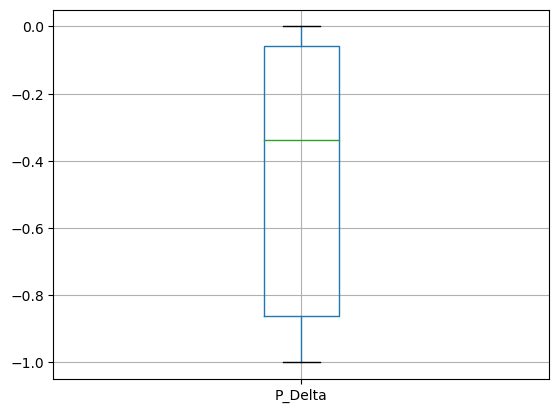

In [10]:
df.boxplot('P_Delta')

<Axes: >

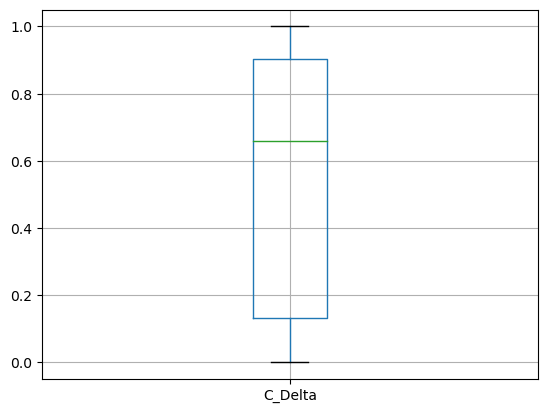

In [11]:
df.boxplot('C_Delta')

<Axes: >

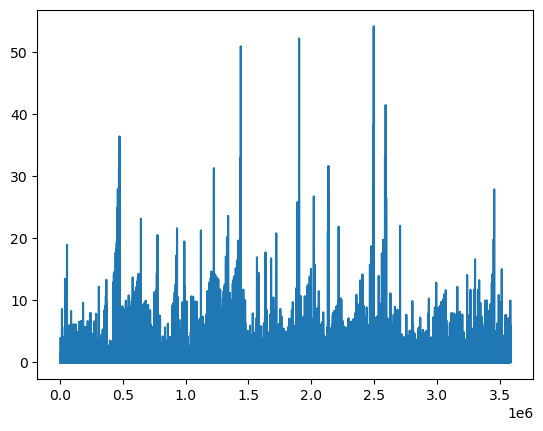

In [12]:
df['C_IV'].plot()

<Axes: xlabel='DTE', ylabel='P_IV'>

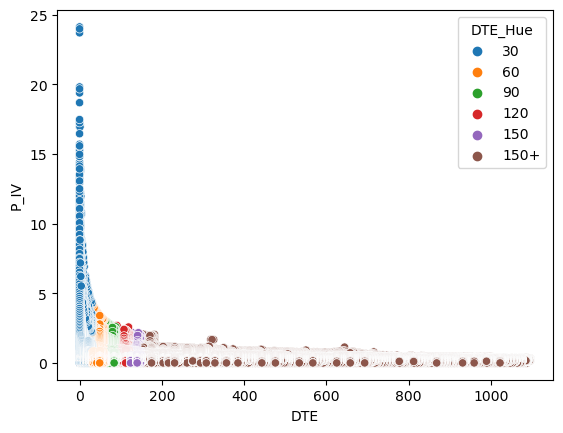

In [108]:
sns.scatterplot(data=df,x='DTE',y='P_IV',hue='DTE_Hue')

<Axes: xlabel='DTE', ylabel='C_IV'>

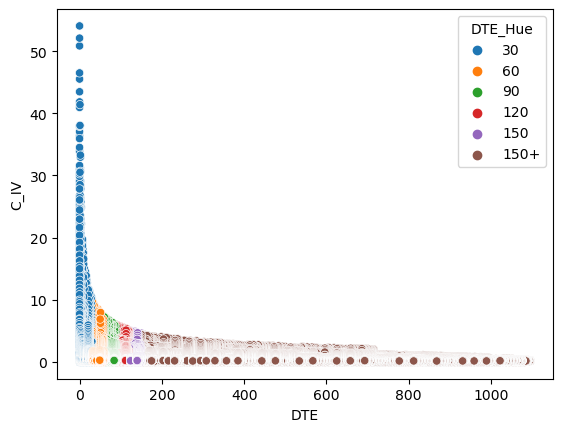

In [107]:
sns.scatterplot(data=df,x='DTE',y='C_IV',hue='DTE_Hue')

<Axes: xlabel='DTE', ylabel='Underlying'>

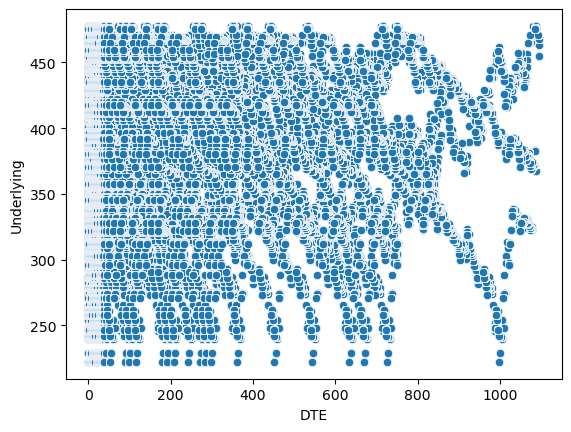

In [74]:
sns.scatterplot(data=df,x='DTE',y='Underlying')

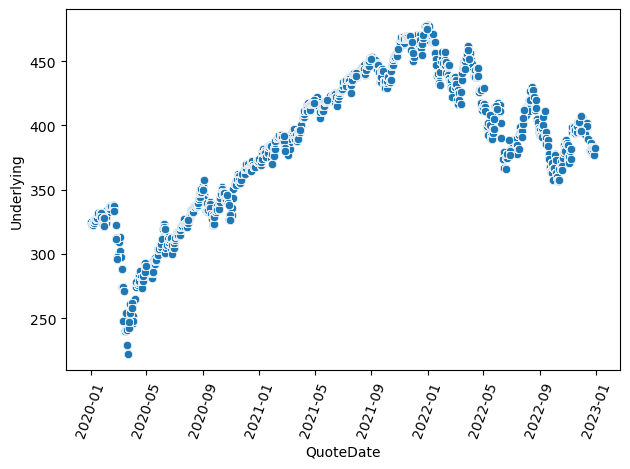

In [80]:
sns.scatterplot(data=df,x='QuoteDate',y='Underlying')
plt.xticks(rotation=70)
plt.tight_layout()

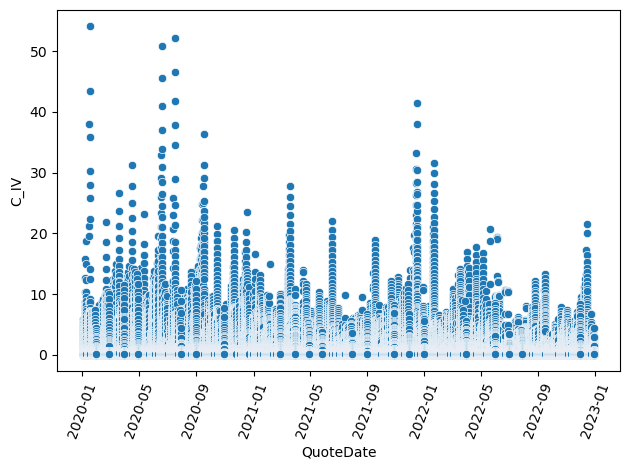

In [81]:
sns.scatterplot(data=df,x='QuoteDate',y='C_IV')
plt.xticks(rotation=70)
plt.tight_layout()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589079 entries, 0 to 3589078
Data columns (total 33 columns):
 #   Column               Dtype  
---  ------               -----  
 0   QuoteTime            int64  
 1   QuoteReadTime        object 
 2   QuoteDate            object 
 3   QuoteTimeHours       float64
 4   Underlying           float64
 5   ExpiryDate           object 
 6   ExpiryUnix           int64  
 7   DTE                  float64
 8   C_Delta              float64
 9   C_Gamma              float64
 10  C_Vega               float64
 11  C_Theta              float64
 12  C_Rho                float64
 13  C_IV                 float64
 14  C_Volume             float64
 15  C_Last               float64
 16  C_Size               object 
 17  C_Bid                float64
 18  C_Ask                float64
 19  C_Strike             float64
 20  P_Bid                float64
 21  P_Ask                float64
 22  P_Size               object 
 23  P_Last               float64
 24

<Axes: xlabel='Strike_Distance', ylabel='Strike_Distance_pct'>

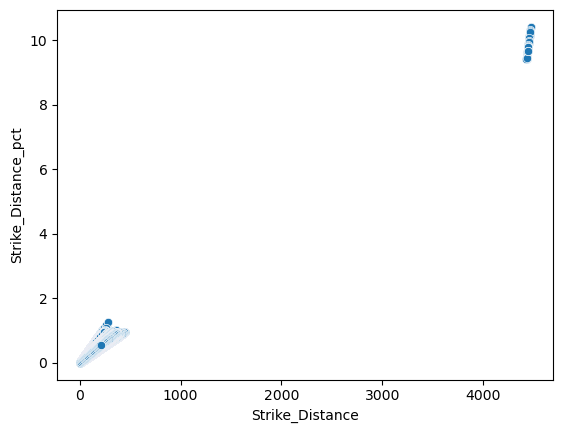

In [69]:
sns.scatterplot(data=df,x="Strike_Distance",y="Strike_Distance_pct")

In [63]:
df_grouped = df.groupby('ExpiryDate').count()
df_exp1 = df[df['ExpiryDate'] == '2020-01-08']

<Axes: xlabel='Strike_Distance', ylabel='P_IV'>

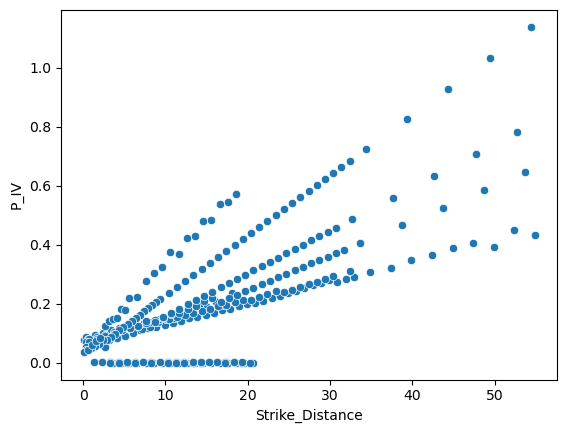

In [67]:
sns.scatterplot(data=df_exp1,x="Strike_Distance",y="P_IV")

<Axes: xlabel='Strike_Distance', ylabel='C_IV'>

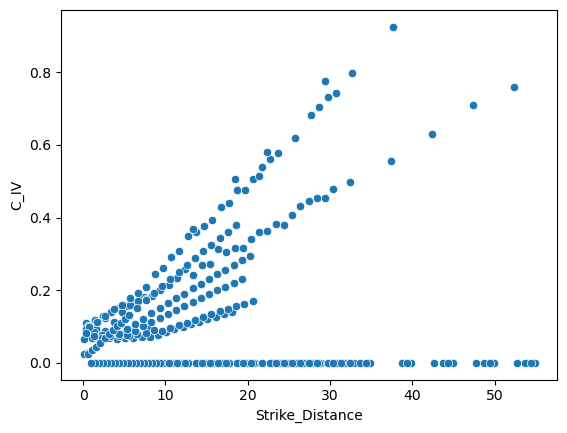

In [66]:
sns.scatterplot(data=df_exp1,x="Strike_Distance",y="C_IV")

In [34]:
#df[df['ExpiryDate'].asdate() == '2021-09-01']
# Convert the date to datetime64
df['ExpiryDate'] = pd.to_datetime(df['ExpiryDate'], format='%Y-%m-%d')
  
# Filter data between two dates
filtered_df = df.loc[(df['ExpiryDate'] >= '2021-01-01')
                     & (df['ExpiryDate'] < '2021-09-10')]
# Display
filtered_df

,QuoteTime,QuoteReadTime,QuoteDate,QuoteTimeHours,Underlying,ExpiryDate,ExpiryUnix,DTE,C_Delta,C_Gamma,...,P_Last,P_Delta,P_Gamma,P_Vega,P_Theta,P_Rho,P_IV,P_Vol,Strike_Distance,Strike_Distance_pct
0,1630526400,2021-09-01 16:00,2021-09-01,16.00000,451.85000,2021-09-01,1630526400,0.00000,1.00000,0.00000,...,0.01000,-0.00024,0.00000,0.00004,-0.00509,0.00000,3.41249,3.00000,181.90000,0.40200
1,1630526400,2021-09-01 16:00,2021-09-01,16.00000,451.85000,2021-09-01,1630526400,0.00000,1.00000,0.00000,...,0.01000,-0.00063,0.00003,0.00019,-0.00480,0.00000,3.29737,0.00000,176.90000,0.39100
2,1630526400,2021-09-01 16:00,2021-09-01,16.00000,451.85000,2021-09-01,1630526400,0.00000,1.00000,0.00000,...,0.01000,0.00000,0.00000,-0.00023,-0.00534,0.00000,3.18330,11.00000,171.90000,0.38000
3,1630526400,2021-09-01 16:00,2021-09-01,16.00000,451.85000,2021-09-01,1630526400,0.00000,1.00000,0.00000,...,0.01000,-0.00016,0.00004,0.00038,-0.00532,0.00000,3.07217,50.00000,166.90000,0.36900
4,1630526400,2021-09-01 16:00,2021-09-01,16.00000,451.85000,2021-09-01,1630526400,0.00000,1.00000,0.00000,...,0.01000,-0.00068,0.00000,0.00045,-0.00515,0.00000,2.96230,0.00000,161.90000,0.35800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587433,1614373200,2021-02-26 16:00,2021-02-26,16.00000,380.36000,2021-08-20,1629489600,174.96000,0.02343,0.00126,...,0.00000,-1.00000,0.00000,22.27427,0.00000,0.00000,-0.00018,0.00000,99.60000,0.26200
3587434,1614373200,2021-02-26 16:00,2021-02-26,16.00000,380.36000,2021-08-20,1629489600,174.96000,0.01850,0.00100,...,0.00000,-1.00000,0.00000,22.27218,0.00000,0.00000,0.00004,0.00000,104.60000,0.27500
3587435,1614373200,2021-02-26 16:00,2021-02-26,16.00000,380.36000,2021-08-20,1629489600,174.96000,0.01533,0.00092,...,0.00000,-1.00000,0.00000,22.26994,0.00000,0.00000,0.00048,0.00000,109.60000,0.28800
3587436,1614373200,2021-02-26 16:00,2021-02-26,16.00000,380.36000,2021-08-20,1629489600,174.96000,0.01305,0.00077,...,0.00000,-1.00000,0.00000,22.26768,0.00000,0.00000,0.00043,0.00000,114.60000,0.30100


In [54]:
df_grouped = df.groupby(['QuoteDate','ExpiryDate','Strike_Distance','C_Last','C_IV']).count()
#[['ExpiryDate','Strike_Distance']]

In [60]:
df['ExpiryDate'].head()

0   2021-09-01
1   2021-09-01
2   2021-09-01
3   2021-09-01
4   2021-09-01
Name: ExpiryDate, dtype: datetime64[ns]

In [56]:
filtered_df = df.loc[(df['ExpiryDate'] >= '2021-01-01')
                     & (df['ExpiryDate'] < '2021-09-10')]

QuoteTime  \
QuoteDate   ExpiryDate Strike_Distance C_Last  C_IV                 
 2020-01-02 2020-01-03 0.10000         0.48000 0.05641          1   
                       0.40000         0.68000 0.04955          1   
                       0.60000         0.26000 0.05560          1   
                       0.90000         1.11000 0.05721          1   
                       1.10000         0.13000 0.05230          1   

                                                        QuoteReadTime  \
QuoteDate   ExpiryDate Strike_Distance C_Last  C_IV                     
 2020-01-02 2020-01-03 0.10000         0.48000 0.05641              1   
                       0.40000         0.68000 0.04955              1   
                       0.60000         0.26000 0.05560              1   
                       0.90000         1.11000 0.05721              1   
                       1.10000         0.13000 0.05230              1   

                                                        QuoteTimeHours  \
QuoteDate   ExpiryDate Strike_Distance C_Last  C_IV                      
 2020-01-02 2020-01-03 0.10000         0.48000 0.05641               1   
                       0.40000         0.68000 0.04955               1   
                       0.60000         0.26000 0.05560               1   
                       0.90000         1.11000 0.05721               1   
                       1.10000         0.13000 0.05230               1   

                                                        Underlying  \
QuoteDate   ExpiryDate Strike_Distance C_Last  C_IV                  
 2020-01-02 2020-01-03 0.10000         0.48000 0.05641           1   
                       0.40000         0.68000 0.04955           1   
                       0.60000         0.26000 0.05560           1   
                       0.90000         1.11000 0.05721           1   
                       1.10000         0.13000 0.05230           1   

                                                        ExpiryUnix  DTE  \
QuoteDate   ExpiryDate Strike_Distance C_Last  C_IV                       
 2020-01-02 2020-01-03 0.10000         0.48000 0.05641           1    1   
                       0.40000         0.68000 0.04955           1    1   
                       0.60000         0.26000 0.05560           1    1   
                       0.90000         1.11000 0.05721           1    1   
                       1.10000         0.13000 0.05230           1    1   

                                                        C_Delta  C_Gamma  \
QuoteDate   ExpiryDate Strike_Distance C_Last  C_IV                        
 2020-01-02 2020-01-03 0.10000         0.48000 0.05641        1        1   
                       0.40000         0.68000 0.04955        1        1   
                       0.60000         0.26000 0.05560        1        1   
                       0.90000         1.11000 0.05721        1        1   
                       1.10000         0.13000 0.05230        1        1   

                                                        C_Vega  C_Theta  ...  \
QuoteDate   ExpiryDate Strike_Distance C_Last  C_IV                      ...   
 2020-01-02 2020-01-03 0.10000         0.48000 0.05641       1        1  ...   
                       0.40000         0.68000 0.04955       1        1  ...   
                       0.60000         0.26000 0.05560       1        1  ...   
                       0.90000         1.11000 0.05721       1        1  ...   
                       1.10000         0.13000 0.05230       1        1  ...   

                                                        P_Size  P_Last  \
QuoteDate   ExpiryDate Strike_Distance C_Last  C_IV                      
 2020-01-02 2020-01-03 0.10000         0.48000 0.05641       1       1   
                       0.40000         0.68000 0.04955       1       1   
                       0.60000         0.26000 0.05560       1       1   
                       0.90000         1.11000 0.05721      